# Combo

## Combo code


module combo (input a, b, c, d, e, output reg z);

    always @ (a or b or c or d or e) begin
        z = ((a & b) | (c ^ d) & ~e);
    end

endmodule


## Combo tb

module combo_tb;   
	reg a, b, c, d, e;   
	wire z;   
	integer i;    
	combo u0 ( a, b, c, d, e, z);  
	initial begin  

		a <= 0;
		b <= 0;
		c <= 0;
		d <= 0;
		e <= 0;

		for (i = 0; i < 32; i = i + 1) begin
			{a, b, c, d, e} = i;
			#10;
		end
	#5 $finish;
end
endmodule

<img src="./combo/combo.png" alt="Схема тиратрона" width="600" />

<img src="./combo/combo_timing.png" alt="Схема тиратрона" width="600" />

# Half adder

## Half adder code

module half_adder(input a,b, output reg sum, count);    
	always @ (a or b) begin    
		{count, sum} = a + b;    
	end   
endmodule    

# Half adder tb

module half_adder_tb;    
  reg a, b;   
  wire sum, cout;    
  integer i;     
  half_adder ha(a, b, sum, cout);    
  initial begin       
    a <= 0;    
    b <= 0;   
    $monitor("a=%0b b=%0b sum=%0b cout=%0b", a, b, sum, cout);    
    for (i = 0; i < 4; i = i + 1)     
    begin    
      {a, b} = i;     
      #10;    
    end    
  end    
endmodule   

<img src="./half_adder/ha.png" alt="Схема тиратрона" width="600" />

<img src="./half_adder/ha_bits.png" alt="Схема тиратрона" width="600" />

<img src="./half_adder/ha_timing.png" alt="Схема тиратрона" width="600" />

# Full adder

## Full adder code

module full_adder( input a, b, cin, output reg sum, cout);   
	always @ (a or b or cin) begin    
		{cout, sum} = a + b + cin;     
	end    
endmodule    

## Full adder tb

module full_adder_tb;   
	reg a, b, cin;   
	wire sum, cout;   
	integer i;     
	full_adder fa ( a, b, cin, sum, cout);     
	initial begin   
		a <= 0;    
		b <= 0;     
		$monitor("a=%0b b=%0b cin=%0b cout=%0b sum=%0b", a, b, cin, cout, sum);     
		for (i = 0; i < 8; i = i + 1) begin    
			{a, b, cin} = i;    
			#10;     
		end    
	end    
endmodule    

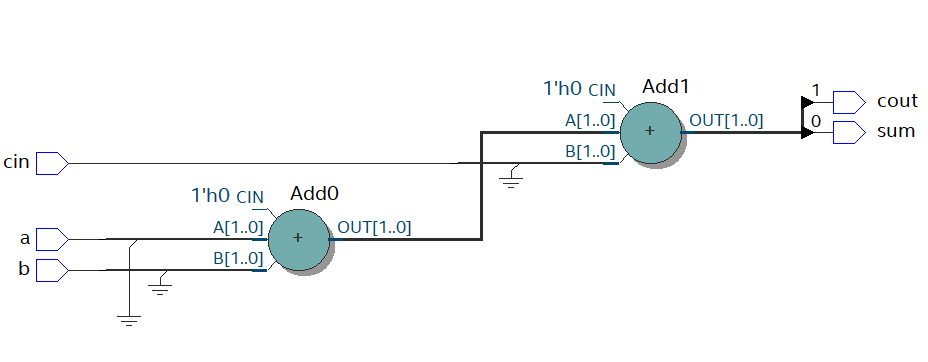

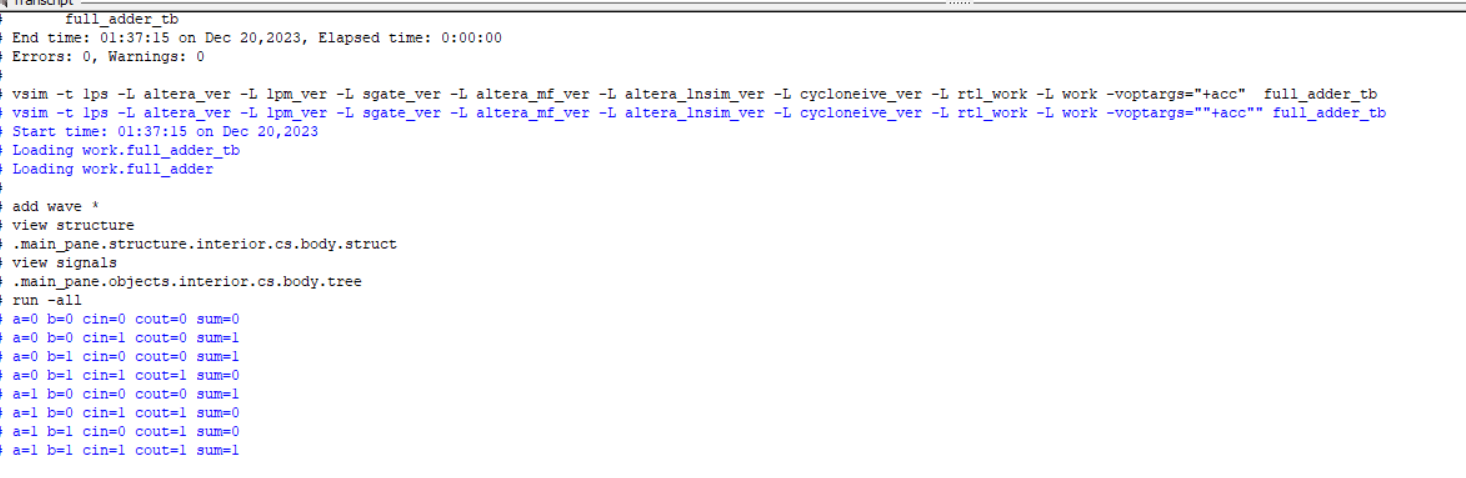

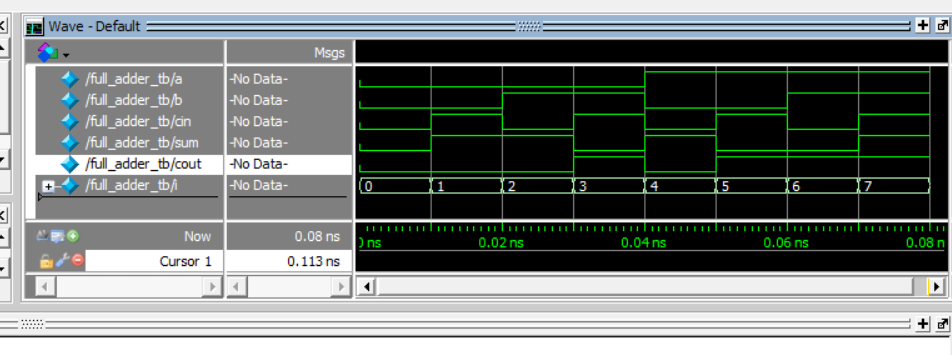

# Demultiplexer 1x4

## Demultiplexer 1x4 code

module demux1x4 ( input f, input [1:0] sel, output reg a, b, c, d);     
  always @ ( f or sel)     
  begin     
    a = f & ~sel[1] & ~sel[0];     
    b = f & sel[1] & ~sel[0];     
    c = f & ~sel[1] & sel[0];     
    d = f & sel[1] & sel[0];     
  end     
endmodule    

## Demultiplexer 1x4 tb

module demux1x4_tb;   
  reg f;    
  reg [1:0] sel;    
  wire a, b, c, d;    
  integer i;     
  demux1x4 mux (f, sel, a, b, c, d);     
  initial    
  begin    
    f <= 0;    
    sel <= 0;    
    $monitor("f=%0b sel=%0b a=%0b b=%0b c=%0b d=%0b", f, sel, a, b, c, d);    
    for (i = 0; i < 8; i = i + 1)     
    begin     
      {f, sel} = i;    
      #10;    
    end    
  end    
endmodule   

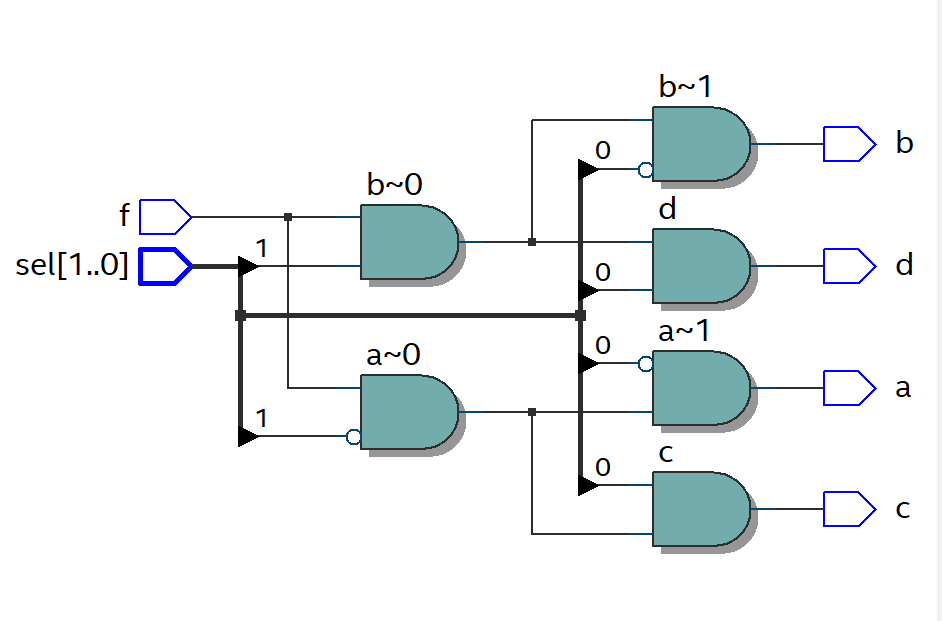

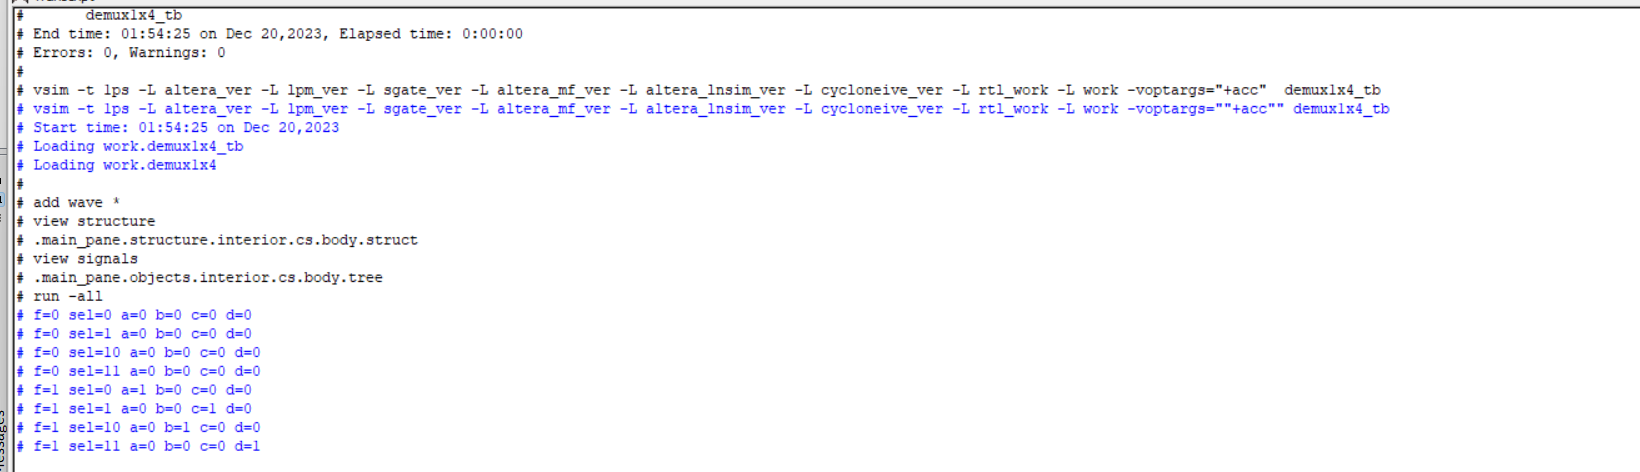

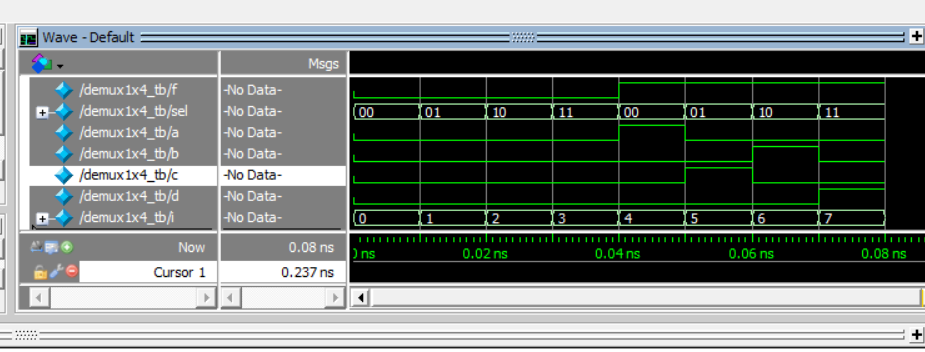

# 2x1 multiplexer

## 2x1 multiplexer

module mux2x1 (input a, b, sel, output reg c);    
  always @ ( a or b or sel)      
  begin    
    c = sel ? a : b;     
  end    
endmodule   

## 2x1 multiplexer

module mux2x1_tb;    
  reg a, b, sel;    
  wire c;    
  integer i;    
  mux2x1 mux ( a, b, sel, c);    
  initial    
  begin    
    $dumpfile("build/mux21_tb.vcd");    
    $dumpvars;    
    a <= 0;    
    b <= 0;    
    sel <= 0;    
    $monitor("a=%0b b=%0b sel=%0b c=%0b", a, b, sel, c);   
    for (i = 0; i < 6; i = i + 1)    
    begin   
      {a, b, sel} = i;    
      #10;    
    end    
  end    
endmodule    

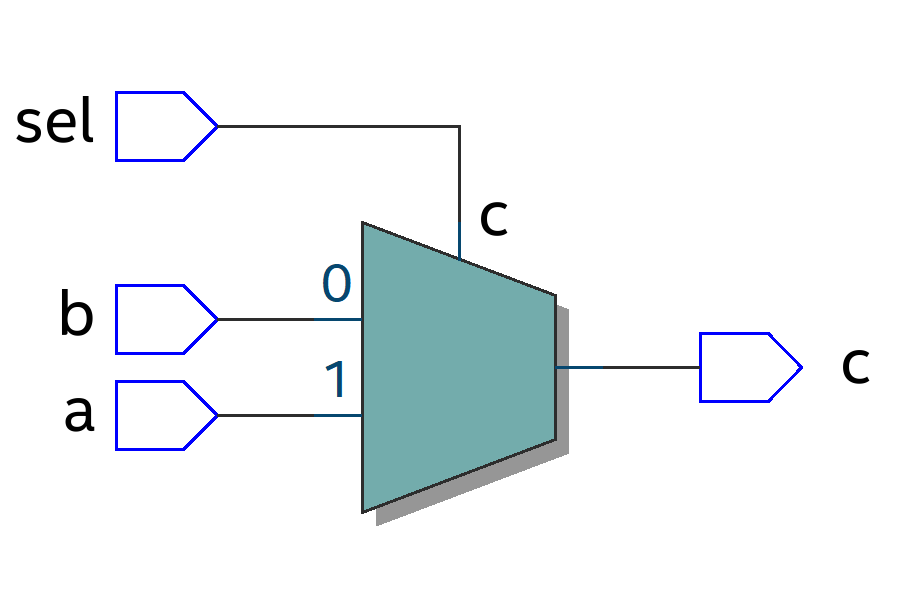

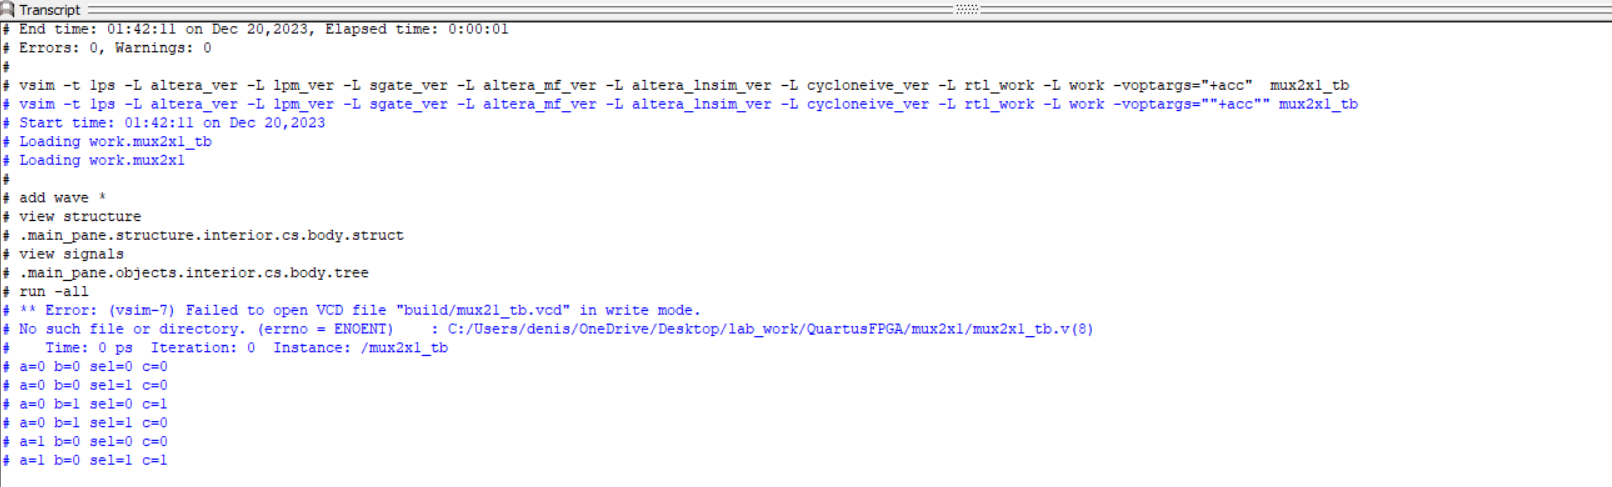

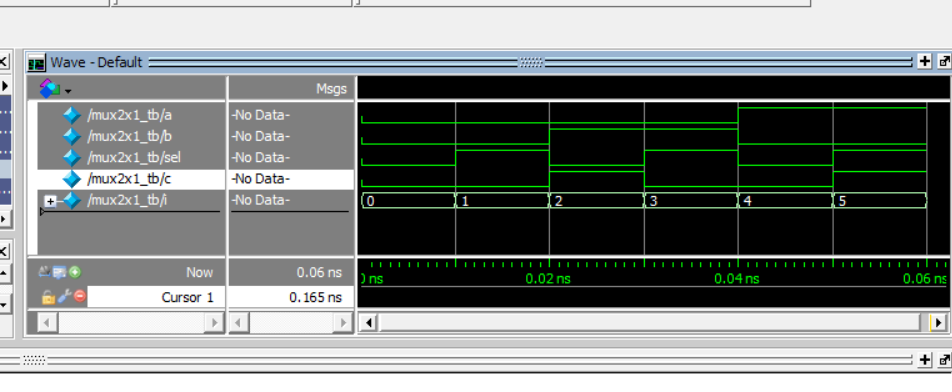

# JK flip flop

## JK flip flop code

module flip_flop ( input j,    
                        input k,    
                        input rstn,    
                        input clk,    
                        output reg q);     
  always @ (posedge clk or negedge rstn)    
  begin    
    if (!rstn)     
    begin     
      q <= 0;     
    end    
    else    
    begin    
      q <= (j & ~q) | (~k & q);    
    end    
  end     
endmodule    

## JK flip flop tb

module flip_flop_tb;     
	reg j, k, rstn, clk;     
	wire q;     
	integer i;     
	reg [2:0] dly;     
	always #10 clk = ~clk;     
	flip_flop ff (j, k, clk, rstn, q);    
	initial begin    

		{j, k, rstn, clk} <= 0;    
		#10 rstn <= 1;     
		for (i = 0; i < 10; i = i+1) begin    
			dly = $random;    
			#(dly) j <= $random;    
			#(dly) k <= $random;    
		end    
		#20 $finish;    
	end    
endmodule   

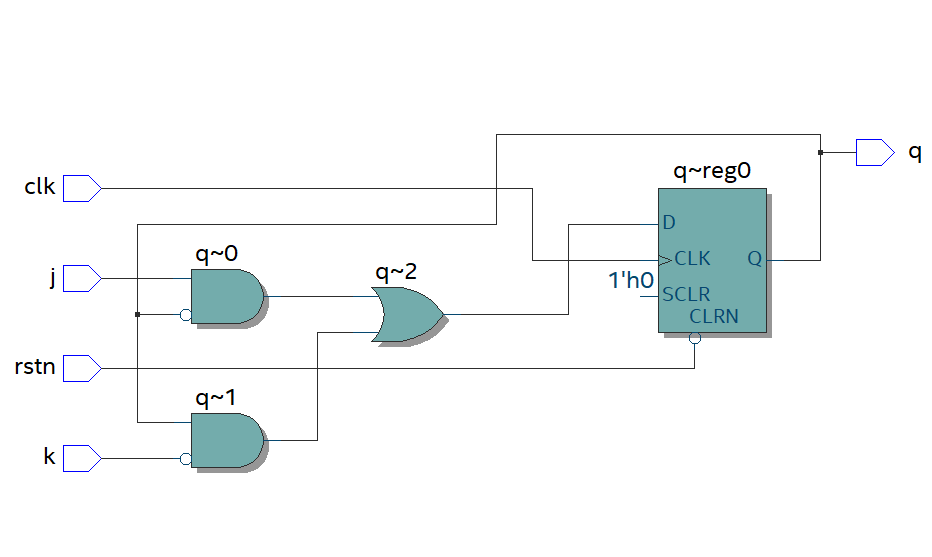

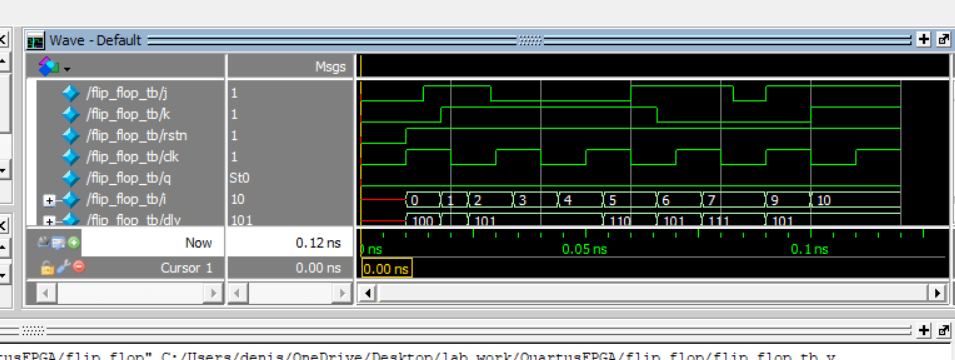

# Mod 10 counter

## Mod 10 counter code

module mod10_count ( input clk,     
                       input rstn,     
                       output reg[3:0] out);     

  always @ (posedge clk)     
  begin     
    if (!rstn)     
    begin     
      out <= 0;     
    end     
    else    
    begin    
      if (out == 10)     
        out <= 0;    
      else    
        out <= out + 1;    
    end   
  end    
endmodule    

## Mod 10 counter tb

module mod10_count_tb;    
	reg clk, rstn;    
	wire [3:0] out;    
	mod10_count u0 ( .clk(clk), .rstn(rstn), .out(out));    
	always #10 clk = ~clk;    
	initial begin    
		{clk, rstn} <= 0;    
		#10 rstn <= 1;    
		#450 $finish;    
	end    
endmodule   

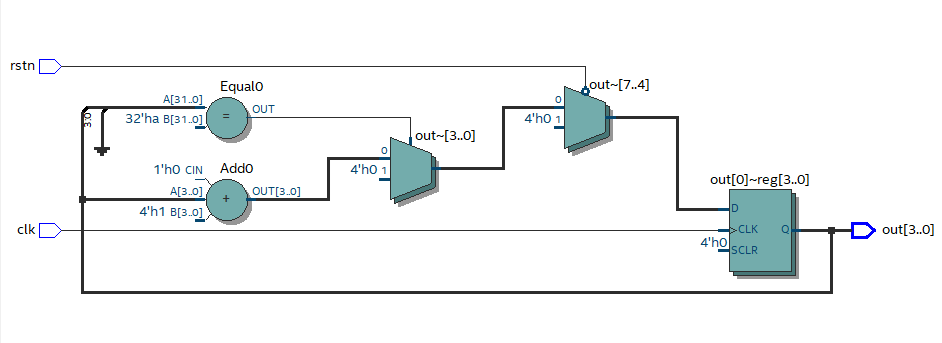

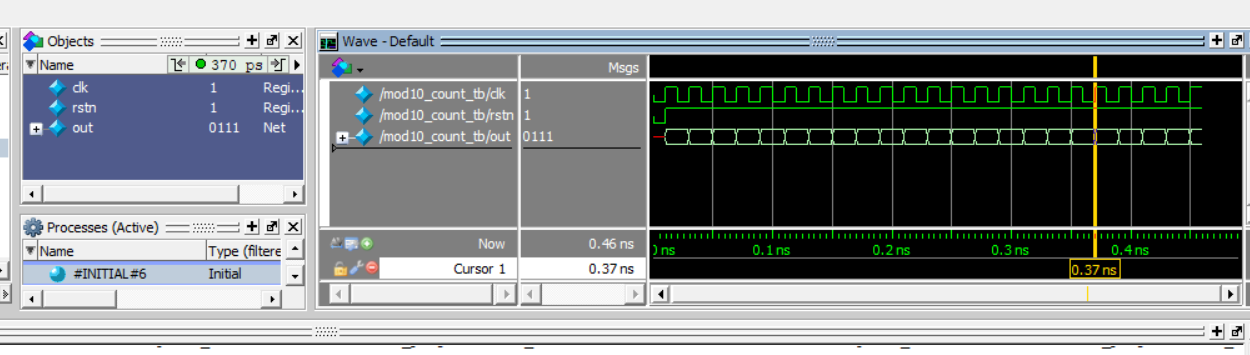

# 4 bit left shift register

## 4 bit left shift register code

module lshift4b(input d,   
                       input clk,   
                       input rstn,   
                       output reg [3:0] out);   
  always @ (posedge clk)   
  begin    
    if (!rstn)    
    begin    
      out <= 0;    
    end    
    else    
    begin    
      out <= {out[2:0], d};    
    end    
  end    
endmodule    

## 4 bit left shift register tb

module lshift4b_tb;    
  reg clk, rstn, d;    
  wire [3:0] out;     
  integer i;    
  lshift4b lsh ( d, clk, rstn, out);     
  always #10 clk = ~clk;     
  initial    
  begin    
    {clk, rstn, d} <= 0;     
    #10 rstn <= 1;    
    for (i = 0; i < 20; i=i+1)    
    begin    
      @(posedge clk) d <= $random;    
    end    
    #10 $finish;    
  end    
endmodule    

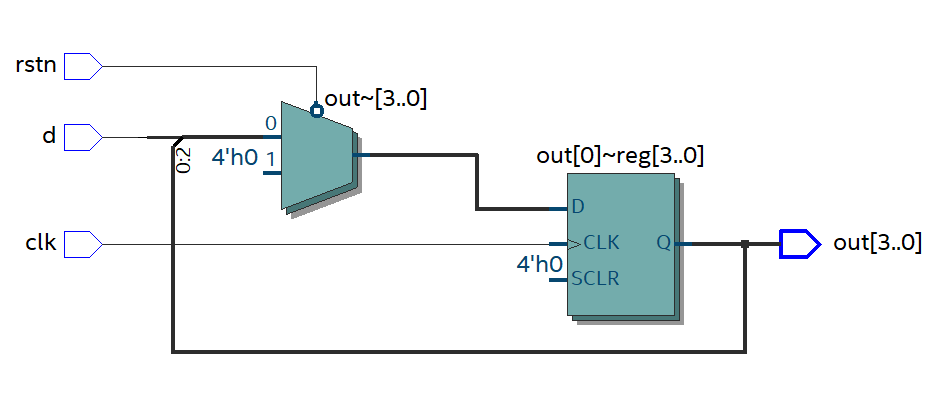

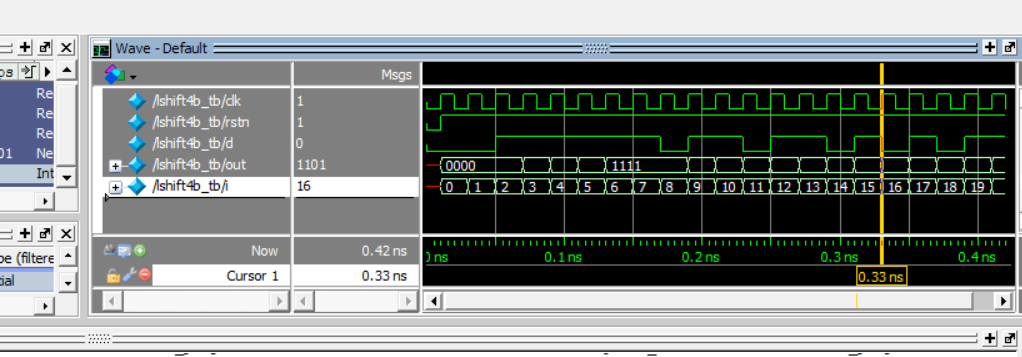

# Result

All elements pass all tests, behave same as in examples